### Maestría en Ciudades Sostenibles

# Manejo y Análisis de Datos
***
## Investigando Distribuciones

Mateo Neira
***

# Fundamentos de Inferencia y Simulaciones

**Objetivo:** Explorar conceptos estadísticos fundamentales como las distribuciones de probabilidad y el Teorema del Límite Central a través de simulaciones prácticas con Python.

En este cuaderno veremos cómo trazar histogramas para observar la distribución de un conjunto de datos. También consideraremos cómo generar datos aleatorios que sigan una distribución específica.

In [29]:
%matplotlib inline

import scipy as sp
import scipy.stats as sps
import numpy as np
import seaborn as sns

import csv
import matplotlib.pyplot as plt

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")

## 1. Distribuciones Discretas

Las distribuciones discretas modelan resultados que son contables.

### 1.1 Distribución Binomial

Modela el número de "éxitos" en una secuencia de `n` ensayos independientes, donde cada ensayo tiene una probabilidad `p` de éxito.

**Ejemplo:** Simulemos 1000 veces el lanzamiento de 10 monedas justas (p=0.5) y veamos cuántas "caras" (éxitos) obtenemos en cada simulación.

In [31]:
import random as rd

#Ya hemos usado la función aleatoria para crear números aleatorios:

print("Aquí hay un número aleatorio", rd.random()) #Da un número aleatorio entre 0 y 1

Aquí hay un número aleatorio 0.50037819090845


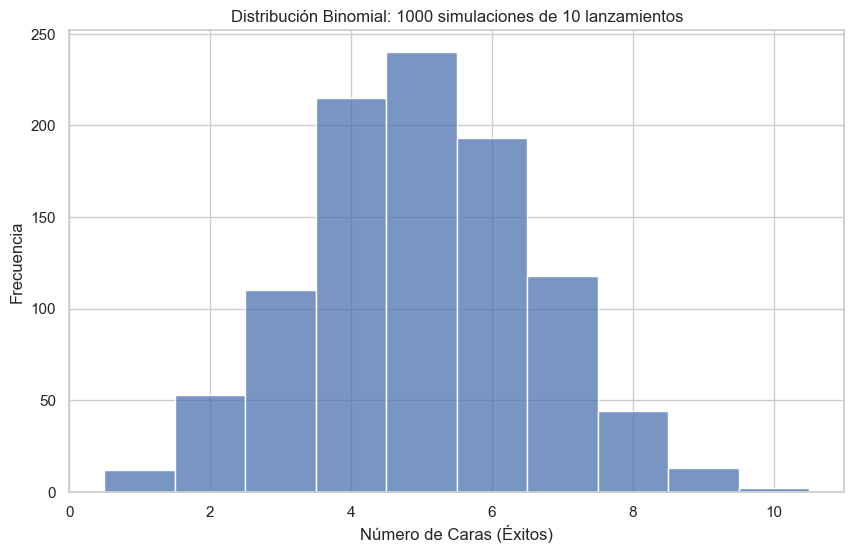

In [30]:
# Parámetros de la simulación
n_ensayos = 10      # Número de monedas lanzadas en cada simulación
p_exito = 0.5       # Probabilidad de 'cara'
n_simulaciones = 1000 # Número de veces que repetimos el experimento

# Realizar la simulación
resultados_binomial = np.random.binomial(n_ensayos, p_exito, n_simulaciones)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.histplot(resultados_binomial, discrete=True)
plt.title(f'Distribución Binomial: {n_simulaciones} simulaciones de {n_ensayos} lanzamientos')
plt.xlabel('Número de Caras (Éxitos)')
plt.ylabel('Frecuencia')
plt.show()

### Distribución de Poisson

Modela el número de eventos que ocurren en un intervalo fijo de tiempo o espacio, dada una tasa promedio (`lambda` o `lam`).

**Ejemplo:** Si una intersección peligrosa tiene un promedio de 3 accidentes por semana, simulemos el número de accidentes que podrían ocurrir en 1000 semanas diferentes.

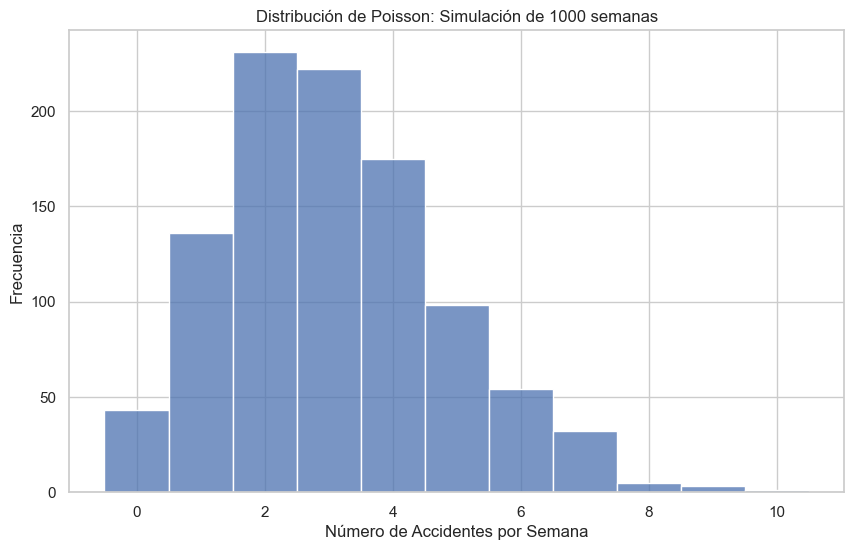

In [32]:
# Parámetros de la simulación
tasa_promedio = 3  # Lambda: 3 accidentes por semana
n_simulaciones_poisson = 1000

# Realizar la simulación
resultados_poisson = np.random.poisson(tasa_promedio, n_simulaciones_poisson)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.histplot(resultados_poisson, discrete=True)
plt.title(f'Distribución de Poisson: Simulación de {n_simulaciones_poisson} semanas')
plt.xlabel('Número de Accidentes por Semana')
plt.ylabel('Frecuencia')
plt.show()

## Distribuciones Continuas

Las distribuciones continuas modelan resultados que pueden tomar cualquier valor dentro de un rango.

### Distribución Uniforme

Todos los resultados en un rango [a, b] son igualmente probables.

**Ejemplo:** Si un autobús pasa cada 20 minutos, tu tiempo de espera (si llegas en un momento aleatorio) se distribuye uniformemente entre 0 y 20 minutos. Simulemos 1000 tiempos de espera.

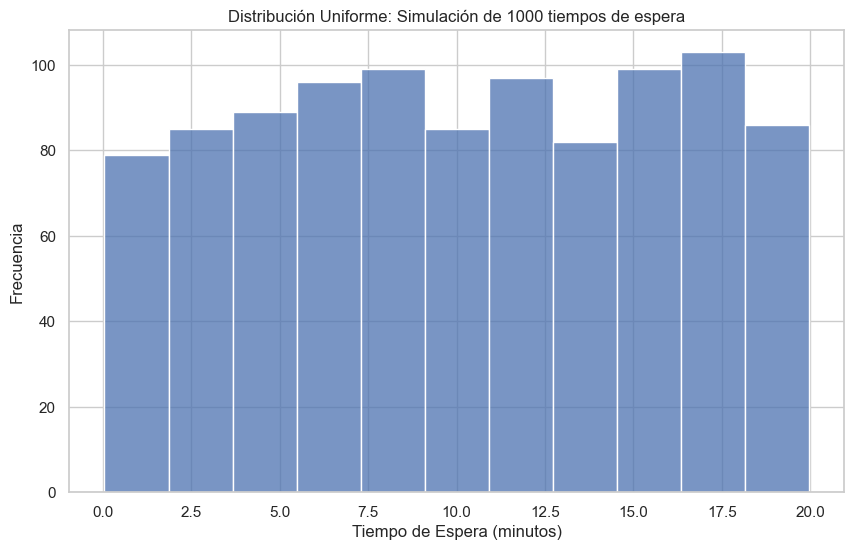

In [33]:
# Parámetros de la simulación
min_espera = 0
max_espera = 20
n_simulaciones_uniforme = 1000

# Realizar la simulación
resultados_uniforme = np.random.uniform(min_espera, max_espera, n_simulaciones_uniforme)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.histplot(resultados_uniforme)
plt.title(f'Distribución Uniforme: Simulación de {n_simulaciones_uniforme} tiempos de espera')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Frecuencia')
plt.show()

### Distribución Normal

La distribución normal o "campana de Gauss" es fundamental en estadística. Está definida por su media (`loc`) y su desviación estándar (`scale`).

**Ejemplo:** Generemos 1000 puntos de datos que sigan una distribución normal que represente, por ejemplo, los precios de alquiler en una zona, con una media de 800 y una desviación estándar de 50.

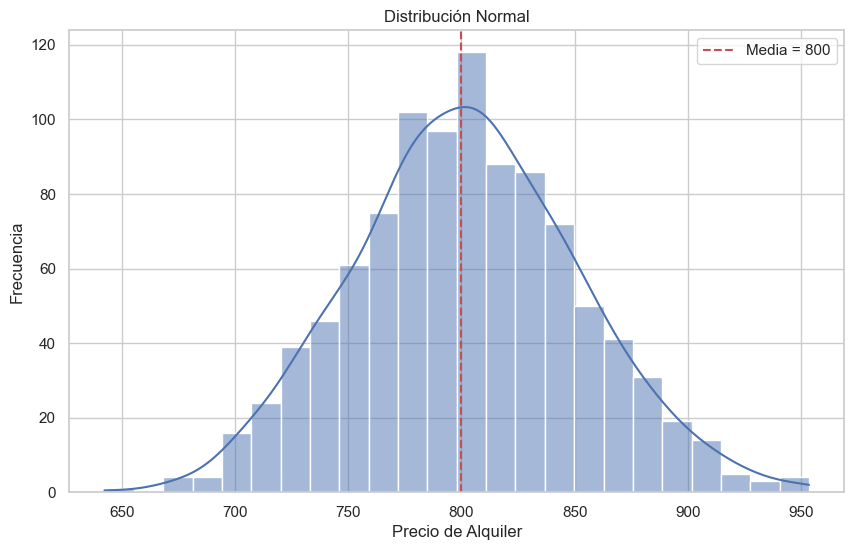

In [34]:
# Parámetros de la distribución normal
media = 800
desv_est = 50
n_puntos = 1000

# Generar datos
datos_normales = np.random.normal(media, desv_est, n_puntos)

# Visualizar la distribución
plt.figure(figsize=(10, 6))
sns.histplot(datos_normales, kde=True) # kde=True añade una línea de densidad
plt.title('Distribución Normal')
plt.xlabel('Precio de Alquiler')
plt.ylabel('Frecuencia')
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media}')
plt.legend()
plt.show()

Nuevamente, puedes regresar y cambiar los parametros para observar cómo cambia la distribución.

## Demostración del Teorema del Límite Central (TLC)

El TLC establece que la distribución de las medias de las muestras de *cualquier* población se aproxima a una distribución normal, siempre que el tamaño de la muestra sea suficientemente grande.

**Demostración:**
1.  Crearemos una **población no normal**. Usaremos una distribución exponencial, que está muy sesgada.
2.  Tomaremos muchas muestras de esta población (ej. 1000 muestras de tamaño 50).
3.  Calcularemos la media de cada una de esas 1000 muestras.
4.  Visualizaremos la distribución de esas medias. ¡Debería parecerse a una campana de Gauss!

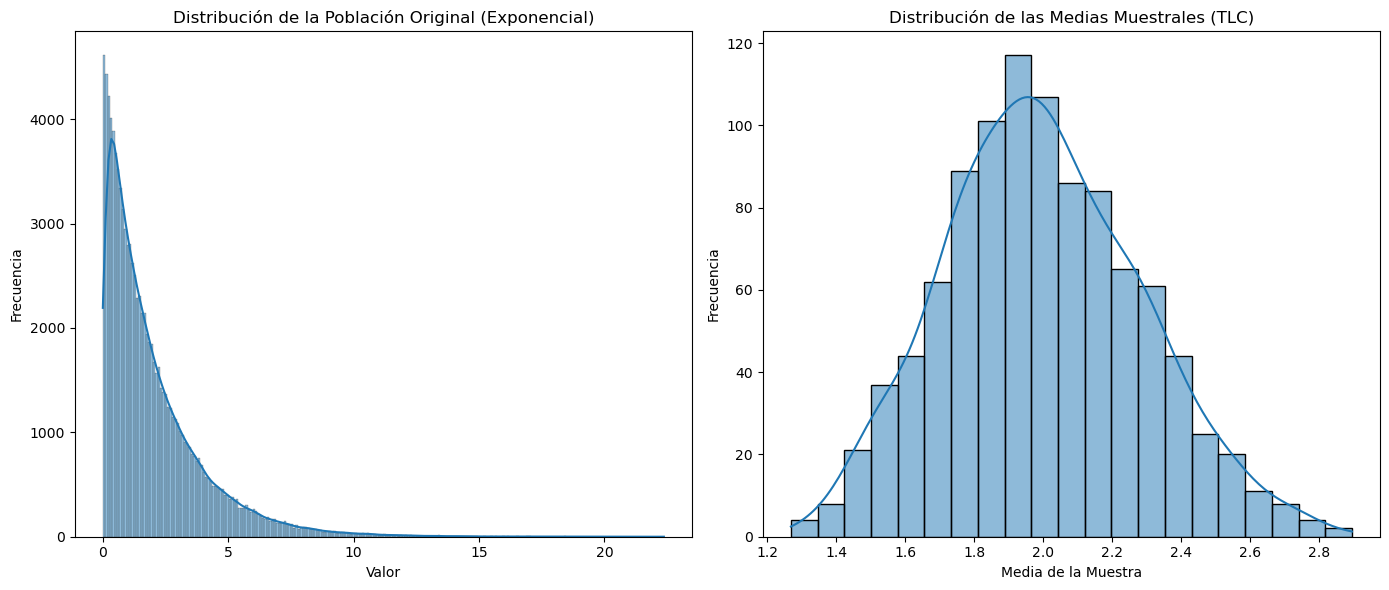

Media de la población original: 2.01
Media de las medias muestrales: 2.00


In [28]:
# 1. Crear una población con distribución exponencial (no normal)
tamano_poblacion = 100000
# El parámetro 'scale' para la exponencial es el inverso de la tasa (lambda).
# Es también la media de la distribución.
poblacion_exp = np.random.exponential(scale=2, size=tamano_poblacion)

# 2. Definir parámetros del muestreo
tamano_muestra = 50
n_muestras = 1000

# 3. Tomar muestras y calcular sus medias
medias_muestrales = []
for i in range(n_muestras):
    muestra = np.random.choice(poblacion_exp, size=tamano_muestra)
    media_muestra = np.mean(muestra)
    medias_muestrales.append(media_muestra)

# 4. Visualizar los resultados
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la población original
sns.histplot(poblacion_exp, kde=True, ax=axes[0])
axes[0].set_title('Distribución de la Población Original (Exponencial)')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')

# Gráfico de las medias muestrales
sns.histplot(medias_muestrales, kde=True, ax=axes[1])
axes[1].set_title('Distribución de las Medias Muestrales (TLC)')
axes[1].set_xlabel('Media de la Muestra')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print(f"Media de la población original: {np.mean(poblacion_exp):.2f}")
print(f"Media de las medias muestrales: {np.mean(medias_muestrales):.2f}")

Altera los valores de mu, sigma, nbins y nsize y observa cómo cambia la distribución.

## Ejercicio 

Importa el conjunto de datos de uaScoresDataFrame.csv.

**uaScoresDataFrame.csv**: datos de Topia. La organización proporciona datos relacionados con la calidad de vida de las ciudades más creativas del mundo, lo que permite a los usuarios encontrar ciudades adecuadas para vivir y trabajar de acuerdo con sus preferencias personales.

Topia (https://blog.topia.com/blog/welcome-to-topia) agrega múltiples fuentes de datos y calcula puntuaciones para áreas urbanas en distintas categorías. Este conjunto de datos proporciona puntuaciones generadas por Topia para vivienda, costo de vida, startups, capital de riesgo, conectividad de viajes, desplazamientos diarios, libertad para hacer negocios, seguridad, atención sanitaria, educación, calidad ambiental, economía, fiscalidad y acceso a internet.

Calcula la media y la desviación estándar de los datos. 

Genera un conjunto de datos de 1000 puntos distribuidos normally con la misma media y desviación estándar que los datos de ingresos.

Guarda tus datos sintéticos como un archivo csv.

Crea un histograma de los datos de ingresos y otro de los datos sintéticos.

Guarda estos histogramas como archivos png.